In [1]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=55f8690edc4f8f2dc41b0058d16a86a213c1a3ecc6ba9ca65682089b000cc813
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [2]:
pip install shap

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import lime
import lime.lime_tabular
import shap


In [4]:
data = pd.read_csv('/content/NSL_KDD_Train.csv')
columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent",
              "hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root",
              "num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login",
              "count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
              "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
              "dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
              "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]
data.columns = columns
# data = data.drop('label', axis=1)
data.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
125967,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.0,1.00,1.0,0.00,0.0,neptune
125968,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.0,0.00,0.0,0.00,0.0,normal
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.0,0.72,0.0,0.01,0.0,normal
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.0,1.00,1.0,0.00,0.0,neptune
125971,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,77,0.30,0.03,0.30,0.0,0.00,0.0,0.00,0.0,normal


In [5]:
data_test=pd.read_csv('/content/NSL_KDD_Train.csv')
data_test.columns = columns
# data_test = data_test.drop('level', axis=1)
data_test.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
125967,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.0,1.00,1.0,0.00,0.0,neptune
125968,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.0,0.00,0.0,0.00,0.0,normal
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.0,0.72,0.0,0.01,0.0,normal
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.0,1.00,1.0,0.00,0.0,neptune
125971,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,77,0.30,0.03,0.30,0.0,0.00,0.0,0.00,0.0,normal


In [6]:
data['label'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [7]:
# changing attack labels to their respective attack class
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [8]:
change_label(data)
data.label.unique()

array(['normal', 'Dos', 'R2L', 'Probe', 'U2R'], dtype=object)

In [9]:
data.label.value_counts()

,count
label,
normal,67342
Dos,45927
Probe,11656
R2L,995
U2R,52


In [10]:
print(data.isnull().values.any())

False


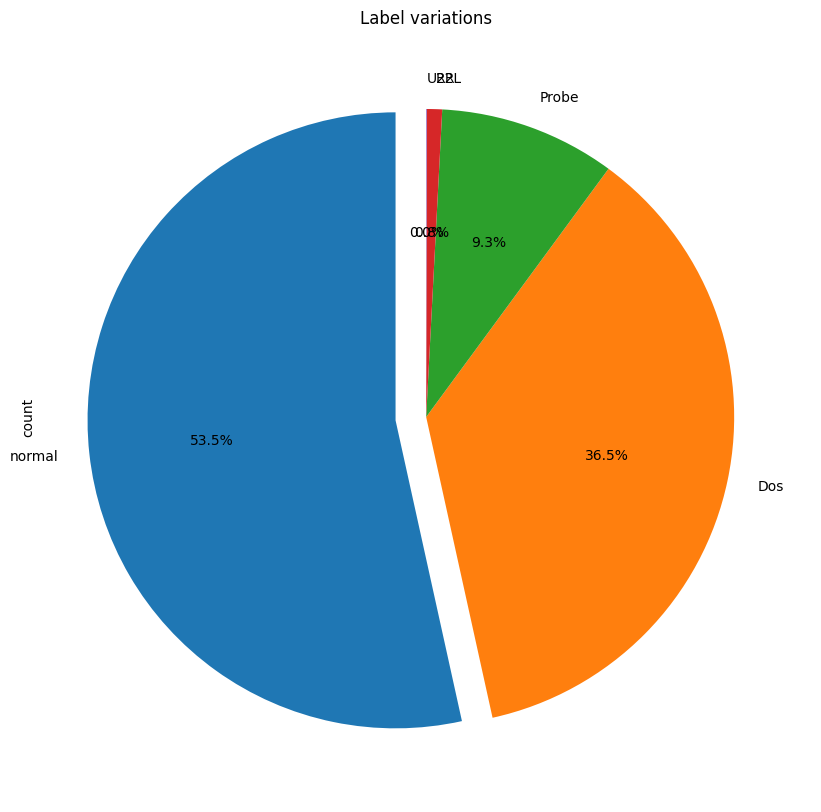

In [11]:
plt.figure(figsize = (10,10))
explode = tuple([0.1] + [0]*(len(data['label'].unique())-1)) # set the first slice to explode
data['label'].value_counts().plot(kind='pie', explode=explode, startangle=90, autopct='%1.1f%%')
plt.title('Label variations')
plt.show()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [13]:
data.head(50)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,Dos
5,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
6,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,Dos
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
8,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,Dos
9,0,tcp,private,REJ,0,0,0,0,0,0,...,12,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,Dos


In [14]:
le = LabelEncoder()
data['protocol_type']=le.fit_transform(data['protocol_type'])
data['service']=le.fit_transform(data['service'])
data['flag']=le.fit_transform(data['flag'])

data['label']=le.fit_transform(data['label'])

data_test['protocol_type']=le.fit_transform(data_test['protocol_type'])
data_test['service']=le.fit_transform(data_test['service'])
data_test['flag']=le.fit_transform(data_test['flag'])

data_test['label']=le.fit_transform(data_test['label'])

In [15]:
data.head(50)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,4
1,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
2,0,1,24,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,4
3,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4
4,0,1,49,1,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,0
5,0,1,49,5,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
6,0,1,49,5,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,0
7,0,1,51,5,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
8,0,1,49,5,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0
9,0,1,49,1,0,0,0,0,0,0,...,12,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,0


In [16]:
False in np.isfinite(data).values

False

In [17]:
# Statistical description of the dataset.
data.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
count,125972.000000,125972.000000,125972.000000,125972.00000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,1.053202,31.226558,6.97998,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,2.247880
std,2604.525522,0.426621,16.346504,2.68937,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,1.904774
min,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,5.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,24.000000,9.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,0.000000,1.000000,49.000000,9.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,4.000000
max,42908.000000,2.000000,69.000000,10.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [18]:
def cross_val(x_train, y_train, model):
    accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv=5)
    return accuracies.mean()

def fit_and_evaluate(model, x_train , x_test , y_train , y_test):
    model.fit(x_train, y_train)

    model_pred = model.predict(x_test)
    model_cross = cross_val(x_train, y_train, model)

    return model_cross

def run_experiment(model, x_train , x_test , y_train , y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
    report=classification_report(y_test,y_pred)
    print(report)

In [19]:
x = data.drop(['label'], axis=1).values
y = data['label'].values

In [20]:
scaler = MinMaxScaler()
x_minmax= scaler.fit_transform(x)
print(x_minmax)

[[0.         1.         0.63768116 ... 0.         0.         0.        ]
 [0.         0.5        0.71014493 ... 1.         0.         0.        ]
 [0.         0.5        0.34782609 ... 0.01       0.         0.01      ]
 ...
 [0.         0.5        0.7826087  ... 0.         0.01       0.        ]
 [0.         0.5        0.43478261 ... 1.         0.         0.        ]
 [0.         0.5        0.28985507 ... 0.         0.         0.        ]]


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [22]:
x_train.shape, x_test.shape

((100777, 41), (25195, 41))

In [23]:
x_traincpy = np.copy(x_train)
y_traincpy = np.copy(y_train)
x_testcpy = np.copy(x_test)
y_testcpy = np.copy(y_test)

logr = LogisticRegression()
logr_cross = fit_and_evaluate(logr, x_traincpy , x_testcpy , y_traincpy , y_testcpy)

print('Logistic Regression Performance on the validatoin set: Cross Validation Score = %0.4f' % logr_cross)

Logistic Regression Performance on the validatoin set: Cross Validation Score = 0.8425


In [24]:
xl_testcpy = np.copy(x_test)
yl_testcpy = np.copy(y_test)

y_pred = logr.predict(x_testcpy)
print("Accuracy on test dataset: ", accuracy_score(yl_testcpy, y_pred))

Accuracy on test dataset:  0.8513990871204604


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_minmax, y, test_size= 0.2, random_state=42)
x_traincpy = np.copy(x_train)
y_traincpy = np.copy(y_train)
x_testcpy = np.copy(x_test)
y_testcpy = np.copy(y_test)

logr = LogisticRegression()
logr_cross = fit_and_evaluate(logr, x_traincpy , x_testcpy , y_traincpy , y_testcpy)

print('Logistic Regression Performance on the validatoin set: Cross Validation Score = %0.4f' % logr_cross)
xl_testcpy = np.copy(x_test)
yl_testcpy = np.copy(y_test)

y_pred = logr.predict(x_testcpy)
print("Accuracy on test dataset: ", accuracy_score(yl_testcpy, y_pred))

Logistic Regression Performance on the validatoin set: Cross Validation Score = 0.9550
Accuracy on test dataset:  0.9534034530660845


Scaling improved efficiency by reducing the processing time and increasing accuracy

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
print(x_scaled)

[[-0.11024967  2.21930219  0.78142044 ... -0.62487425 -0.38763494
  -0.37638873]
 [-0.11024967 -0.12470666  1.08729745 ...  1.61894633 -0.38763494
  -0.37638873]
 [-0.11024967 -0.12470666 -0.44208761 ... -0.60243604 -0.38763494
  -0.34508583]
 ...
 [-0.11024967 -0.12470666  1.39317446 ... -0.62487425 -0.35501463
  -0.37638873]
 [-0.11024967 -0.12470666 -0.0750352  ...  1.61894633 -0.38763494
  -0.37638873]
 [-0.11024967 -0.12470666 -0.68678922 ... -0.62487425 -0.38763494
  -0.37638873]]


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size= 0.2, random_state=42)
x_traincpy = np.copy(x_train)
y_traincpy = np.copy(y_train)
x_testcpy = np.copy(x_test)
y_testcpy = np.copy(y_test)

logr = LogisticRegression()
logr_cross = fit_and_evaluate(logr, x_traincpy , x_testcpy , y_traincpy , y_testcpy)

print('Logistic Regression Performance on the validatoin set: Cross Validation Score = %0.4f' % logr_cross)
xl_testcpy = np.copy(x_test)
yl_testcpy = np.copy(y_test)

y_pred = logr.predict(x_testcpy)
print("Accuracy on test dataset: ", accuracy_score(yl_testcpy, y_pred))

Logistic Regression Performance on the validatoin set: Cross Validation Score = 0.9655
Accuracy on test dataset:  0.9638420321492359


In [28]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_scaled = scaler.fit_transform(x)
print(x_scaled)

[[ 0.          1.          0.68965517 ...  0.          0.
   0.        ]
 [ 0.          0.          0.86206897 ...  1.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.01        0.
   0.01      ]
 ...
 [ 0.          0.          1.03448276 ...  0.          0.01
   0.        ]
 [ 0.          0.          0.20689655 ...  1.          0.
   0.        ]
 [ 0.          0.         -0.13793103 ...  0.          0.
   0.        ]]


In [29]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size= 0.2, random_state=42)
x_traincpy = np.copy(x_train)
y_traincpy = np.copy(y_train)
x_testcpy = np.copy(x_test)
y_testcpy = np.copy(y_test)

logr = LogisticRegression()
logr_cross = fit_and_evaluate(logr, x_traincpy , x_testcpy , y_traincpy , y_testcpy)

print('Logistic Regression Performance on the validatoin set: Cross Validation Score = %0.4f' % logr_cross)
xl_testcpy = np.copy(x_test)
yl_testcpy = np.copy(y_test)

y_pred = logr.predict(x_testcpy)
print("Accuracy on test dataset: ", accuracy_score(yl_testcpy, y_pred))

Logistic Regression Performance on the validatoin set: Cross Validation Score = 0.8508
Accuracy on test dataset:  0.8473506648144473


In [30]:
scaler = StandardScaler()
x_new = scaler.fit_transform(x_scaled)
print(x_new)

[[-0.11024967  2.21930219  0.78142044 ... -0.62487425 -0.38763494
  -0.37638873]
 [-0.11024967 -0.12470666  1.08729745 ...  1.61894633 -0.38763494
  -0.37638873]
 [-0.11024967 -0.12470666 -0.44208761 ... -0.60243604 -0.38763494
  -0.34508583]
 ...
 [-0.11024967 -0.12470666  1.39317446 ... -0.62487425 -0.35501463
  -0.37638873]
 [-0.11024967 -0.12470666 -0.0750352  ...  1.61894633 -0.38763494
  -0.37638873]
 [-0.11024967 -0.12470666 -0.68678922 ... -0.62487425 -0.38763494
  -0.37638873]]


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size= 0.2, random_state=42)
x_traincpy = np.copy(x_train)
y_traincpy = np.copy(y_train)
x_testcpy = np.copy(x_test)
y_testcpy = np.copy(y_test)

logr = LogisticRegression()
logr_cross = fit_and_evaluate(logr, x_traincpy , x_testcpy , y_traincpy , y_testcpy)

print('Logistic Regression Performance on the validatoin set: Cross Validation Score = %0.4f' % logr_cross)
xl_testcpy = np.copy(x_test)
yl_testcpy = np.copy(y_test)

y_pred = logr.predict(x_testcpy)
print("Accuracy on test dataset: ", accuracy_score(yl_testcpy, y_pred))

Logistic Regression Performance on the validatoin set: Cross Validation Score = 0.9655
Accuracy on test dataset:  0.9638420321492359


Robust Scaler is used to remove outliers from the dataset.
MinMax scaler scales the feature values such that they lie in the range [0,1] or [-1,1](in case of negative values).
Standard scaler results in scaled values that follow standard normal distribution with mean=0, variance=1.


Using Standard/ MinMax scalers after Robust scaler gives the same output as without the Robust Scaler. Thus indicating the absence of outliers in the dataset.

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)
x_traincpy = np.copy(x_train)
y_traincpy = np.copy(y_train)
x_testcpy = np.copy(x_test)
y_testcpy = np.copy(y_test)

random = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
random_cross = fit_and_evaluate(random, x_traincpy , x_testcpy , y_traincpy , y_testcpy)

print('Random Forest Performance on the validation set: Cross Validation Score = %0.4f' % random_cross)
xl_testcpy = np.copy(x_test)
yl_testcpy = np.copy(y_test)

y_pred = random.predict(x_test)
print("Accuracy on test: ", accuracy_score(y_testcpy, y_pred))

Random Forest Performance on the validation set: Cross Validation Score = 0.9987
Accuracy on test:  0.9989680492161143


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size= 0.2, random_state=42)
x_traincpy = np.copy(x_train)
y_traincpy = np.copy(y_train)
x_testcpy = np.copy(x_test)
y_testcpy = np.copy(y_test)

random = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
random_cross = fit_and_evaluate(random, x_traincpy , x_testcpy , y_traincpy , y_testcpy)

print('Random Forest Performance on the validation set: Cross Validation Score = %0.4f' % random_cross)
xl_testcpy = np.copy(x_test)
yl_testcpy = np.copy(y_test)

y_pred = random.predict(x_test)
print("Accuracy on test: ", accuracy_score(y_testcpy, y_pred))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_minmax, y, test_size= 0.2, random_state=42)
x_traincpy = np.copy(x_train)
y_traincpy = np.copy(y_train)
x_testcpy = np.copy(x_test)
y_testcpy = np.copy(y_test)

random = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
random_cross = fit_and_evaluate(random, x_traincpy , x_testcpy , y_traincpy , y_testcpy)

print('Random Forest Performance on the validation set: Cross Validation Score = %0.4f' % random_cross)

In [ ]:
xl_testcpy = np.copy(x_test)
yl_testcpy = np.copy(y_test)
#nkm
y_pred = random.predict(x_test)
print("Accuracy on test: ", accuracy_score(y_testcpy, y_pred))

In [ ]:
x1_testcpy= np.copy(x_test)

In [ ]:
x1_testcpy[start_index:end_index]

In [ ]:
class_report = classification_report(yl_testcpy, y_pred)
print("Classification Report:")
print(class_report)

In [ ]:
#XAI

In [ ]:
def explain_model(model, x_train, explainer_type):
    if explainer_type == 'lime':
        explainer = lime.lime_tabular.LimeTabularExplainer(x_train, mode='classification', feature_names=data.drop(['label'], axis=1).columns)
    elif explainer_type == 'shap':
        explainer = shap.KernelExplainer(model.predict, x_train)
    else:
        raise ValueError("Invalid explainer type. Choose either 'lime' or 'shap'.")

    return explainer

In [ ]:
data_test = data_test.drop(data_test[data_test['dst_bytes'] >1750].index)
data_test = data_test.drop(data_test[data_test['src_bytes'] > 717].index)

In [ ]:
x_wo = data.drop(['label'], axis=1).values
y_wo = data['label'].values

In [ ]:
# scaling the dataset.
# ro_scaler = RobustScaler()
# x_wo_scaled = ro_scaler.fit_transform(x_wo)

# scaler = MinMaxScaler()
# x_wo_scaled = scaler.fit_transform(x_wo_scaled)

In [ ]:
# x_wo_train , x_wo_test , y_wo_train , y_wo_test = train_test_split(x_wo_scaled, y_wo, test_size= 0.2 , random_state=42)

In [ ]:
# x_wo_train.shape, x_wo_test.shape

In [ ]:
# xl_wo_test = data_test.drop(['label'], axis=1).values
# yl_wo_test = data_test['label'].values
# scaler = MinMaxScaler()
# xl_wo_test = scaler.fit_transform(xl_wo_test)

In [ ]:
# x_traincpy = np.copy(x_wo_train)
# y_traincpy = np.copy(y_wo_train)
# x_testcpy = np.copy(x_wo_test)
# y_testcpy = np.copy(y_wo_test)

# random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
# random_cross = fit_and_evaluate(random, x_traincpy , x_testcpy , y_traincpy , y_testcpy)

# print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

In [ ]:
# xl_testcpy = np.copy(xl_wo_test)
# yl_testcpy = np.copy(yl_wo_test)

# y_pred = random.predict(xl_testcpy)
# print("Accuracy: ", accuracy_score(yl_testcpy, y_pred))

In [ ]:
class_report = classification_report(yl_testcpy, y_pred)
print("Classification Report:")
print(class_report)

In [ ]:
explainer_lime = explain_model(random, x_traincpy, 'lime')
explainer_shap = explain_model(random, x_traincpy, 'shap')

In [ ]:
# Lime explanation
import lime
lime_explanation = explainer_lime.explain_instance(x_testcpy[0], random.predict_proba, num_features=len(data.drop(['label'], axis=1).columns))
lime_explanation.show_in_notebook(show_table=True)

In [ ]:
explainer_shap = shap.TreeExplainer(random,x_traincpy)

In [ ]:
shap_values = explainer_shap.shap_values(x_traincpy[0],y_traincpy[0])

shap_explainer_values = explainer_shap(x_traincpy, y_traincpy)

In [ ]:
print(shap_values)

In [ ]:
print(shap_values[:,0].shape)

In [ ]:
print(x_testcpy[start_index:end_index].shape)

In [ ]:
x1_testcpy[start_index:end_index]

In [ ]:
# Define start and end indices
start_index = 0   # Example starting index
end_index = 1    # Example ending index

In [ ]:
print(explainer_shap.expected_value[0])

In [ ]:
prediction = random.predict(x1_testcpy[start_index:end_index])[0]
print(f"The RF predicted: {prediction}")

In [ ]:
xl_testcpy_df=pd.DataFrame(x1_testcpy,columns=columns[:-1])

In [ ]:
xl_testcpy=pd.DataFrame(x1_testcpy,columns=columns[:-1])

In [ ]:
print(x1_testcpy.shape)

In [ ]:
shap.initjs()
# force plot
shap.force_plot(explainer_shap.expected_value[0],
                shap_values[:,0],
                x1_testcpy[start_index:end_index])

In [ ]:
type(shap_values)

In [ ]:
print(type(shap_explainer_values))
print(len(shap_explainer_values))
print(type(shap_explainer_values[0]))
print(shap_explainer_values[0])


In [ ]:
print(type(shap_explainer_values))
print(len(shap_explainer_values))
print(type(shap_explainer_values[0]))
print(shap_explainer_values[0].shape)
print(shap_explainer_values[0].base_values)


In [ ]:
instance_index = 0  # Change this to the index of the instance you want to plot

# Check if the instance_index is valid
if instance_index < len(shap_explainer_values):
    shap_value_single_instance = shap_explainer_values[instance_index]

    # Check the structure of the selected instance
    print(type(shap_value_single_instance))
    print(shap_value_single_instance.shape)
    print(shap_value_single_instance.base_values)

    # Ensure base_values is a scalar
    if isinstance(shap_value_single_instance.base_values, (list, np.ndarray)):
        print("base_values is not a scalar.")
    else:
        shap.waterfall_plot(shap_value_single_instance)
else:
    print(f"Index {instance_index} is out of bounds for shap_explainer_values with size {len(shap_explainer_values)}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap

# Load the dataset
file_path = 'NSL_KDD_Train.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Convert categorical features to numerical if necessary
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Explain the model's predictions using SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Choose an instance to explain
instance_index = 0  # Change this to the index of the instance you want to explain
shap_value_single_instance = shap_values[instance_index]

# Ensure data (features) is an array and feature_names are set
if np.isscalar(shap_value_single_instance.data):
    shap_value_single_instance.data = np.array([shap_value_single_instance.data])

if shap_value_single_instance.feature_names is None:
    shap_value_single_instance.feature_names = [f"feature_{i}" for i in range(len(shap_value_single_instance.values))]

# Plot the waterfall plot for local explainability
shap.waterfall_plot(shap_value_single_instance)


In [ ]:
instance_index = 0  # Change this to the index of the instance you want to plot

# Check if the instance_index is valid
if instance_index < len(shap_explainer_values):
    shap_value_single_instance = shap_explainer_values[instance_index]

    # Check the structure of the selected instance
    print(type(shap_value_single_instance))
    print(shap_value_single_instance.shape)
    print(shap_value_single_instance.base_values)

    # Ensure base_values is a scalar
    if isinstance(shap_value_single_instance.base_values, (list, np.ndarray)):
        print("base_values is not a scalar.")
        if len(shap_value_single_instance.base_values) == 1:
            # If it's a single-element array, take the first element
            shap_value_single_instance.base_values = shap_value_single_instance.base_values[0]
        else:
            # If it's a multi-element array, take the mean (or sum)
            shap_value_single_instance.base_values = np.mean(shap_value_single_instance.base_values)
            # Alternative: shap_value_single_instance.base_values = np.sum(shap_value_single_instance.base_values)
    else:
        print("base_values is already a scalar.")

    # Ensure data (features) is an array and feature_names are set
    if np.isscalar(shap_value_single_instance.data):
        shap_value_single_instance.data = np.array([shap_value_single_instance.data])

    if shap_value_single_instance.feature_names is None:
        shap_value_single_instance.feature_names = [f"feature_{i}" for i in range(len(shap_value_single_instance.values))] # Use the length of values instead of data

    # Check the features and feature_names
    print("Features:", shap_value_single_instance.data)
    print("Feature Names:", shap_value_single_instance.feature_names)

    # Check if the number of features matches the number of SHAP values
    if len(shap_value_single_instance.data) != len(shap_value_single_instance.values):
        print("WARNING: Mismatch between the number of features and SHAP values. Waterfall plot may be inaccurate.")

    shap.waterfall_plot(shap_value_single_instance)
else:
    print(f"Index {instance_index} is out of bounds for shap_explainer_values with size {len(shap_explainer_values)}")

In [ ]:
shap.waterfall_plot(shap_explainer_values)

In [ ]:
shap.waterfall_plot(shap_explainer_values[0])

In [ ]:
# Ensure single data point is correctly indexed and formatted
single_data_point = x_testcpy[1]  # Assuming x_testcpy is a DataFrame and needs to be 2D
# Generate SHAP values for the single data point
try:
    shap_values_single = explainer_shap.shap_values(single_data_point)

except KeyboardInterrupt:
    print("SHAP value computation was interrupted. Please check the size and complexity of the input data and model.")
    shap_values_single = None

if shap_values_single is not None:
    # Check if the model is a classifier or regressor
    if isinstance(shap_values_single, list):
        # If it's a classifier, select the SHAP values for the first class
        shap_values_to_plot = shap_values_single[1][0]  # Extract SHAP values for the first instance
        base_value = explainer_shap.expected_value[1]
    else:
        # If it's a regressor, use the SHAP values directly
        shap_values_to_plot = shap_values_single[0]  # Extract SHAP values for the first instance
        base_value = explainer_shap.expected_value

    # Convert base_value to scalar if it is an array
    if isinstance(base_value, (list, np.ndarray)):
        base_value = base_value[0]  # Convert to scalar if base_value is a list or array

    # Wrap the SHAP values in an Explanation object
    explanation = shap.Explanation(values=shap_values_to_plot, base_values=base_value, data=single_data_point, feature_names=data.columns[:-1])

    # Check the explanation object for correctness
    print(explanation)

    # Create waterfall plot
    shap.plots.waterfall(explanation)

    # Save the plot as a file
    plt.savefig('shap_waterfall_plot_single.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

In [ ]:
print(shap_values_single)

In [ ]:
# explainer_shap = explain_model(random, x_traincpy , 'shap')
# shap.summary_plot(shap_values, x_testcpy, feature_names=data.columns[:-1] , show=False)

# Save the plot as a file
# plt.savefig('shap_rf_plot.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

# Display the plot
# img = plt.imread('/content/shap_force_plot_single.png')
# plt.imshow(img)
# plt.axis('off')
# plt.show()

TRUST-XAI for explaining outputs of a random forest classiifer on nsl kdd dataset for intrusion detection. The code gives mcc scores and accuracies for different number of representatives taken. Also gives top contributing features of every representative.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, matthews_corrcoef
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import norm
import matplotlib.pyplot as plt

# Load NSL-KDD dataset
df = pd.read_csv('/content/NSL_KDD_Train.csv', header=None)
df.columns = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent",
              "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
              "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login",
              "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
              "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate",
              "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate",
              "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]

# Encoding categorical features
protocol_type_mapping = {'tcp': 0, 'udp': 1, 'icmp': 2}
service_mapping = {k: v for v, k in enumerate(df['service'].unique())}
flag_mapping = {k: v for v, k in enumerate(df['flag'].unique())}
df['protocol_type'] = df['protocol_type'].map(protocol_type_mapping)
df['service'] = df['service'].map(service_mapping)
df['flag'] = df['flag'].map(flag_mapping)

# Binary classification: normal vs attack
df['label'] = df['label'].apply(lambda x: 0 if x == 'normal' else 1)

# Splitting features and labels
X = df.drop(['label'], axis=1)
y = df['label']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle missing values
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)

# Factor Analysis to extract latent variables
fa = FactorAnalysis(n_components=10, random_state=42)
X_train_fa = fa.fit_transform(X_train)
X_test_fa = fa.transform(X_test)

# Calculate feature importances using Mutual Information
def calculate_mutual_info_importances(X, y):
    return mutual_info_classif(X, y)

# Calculate feature importances using Mutual Information
mutual_info_indices = calculate_mutual_info_importances(X_train_fa, y_train)

# Function to build and train the Random Forest model
def build_and_train_rf(X_train, y_train, X_val, y_val):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    return model, accuracy

# Evaluate the model for different number of top features
num_representatives = [2, 4, 6, 8, 10]
accuracies_mutual_info = []
mcc_scores = []

for k in num_representatives:
    top_k_indices = np.argsort(mutual_info_indices)[-k:]
    X_train_top_k = X_train_fa[:, top_k_indices]
    X_test_top_k = X_test_fa[:, top_k_indices]

    # Split train data into training and validation sets
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_top_k, y_train, test_size=0.2, random_state=42)

    model, accuracy = build_and_train_rf(X_train_split, y_train_split, X_val_split, y_val_split)
    accuracies_mutual_info.append(accuracy)

    # Calculate MCC score for the test set
    y_pred_test = model.predict(X_test_top_k)
    mcc = matthews_corrcoef(y_test, y_pred_test)
    mcc_scores.append(mcc)

    print(f"Model accuracy with top {k} representatives (Mutual Information): {accuracy}")
    print(f"Model MCC with top {k} representatives (Mutual Information): {mcc}")

# Plot the accuracies and MCC scores
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(num_representatives, accuracies_mutual_info, marker='o', label='Mutual Information - Accuracy')
plt.xlabel('Number of Representatives')
plt.ylabel('Accuracy')
plt.title('Model Accuracy for Different Number of Representatives')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(num_representatives, mcc_scores, marker='o', label='Mutual Information - MCC', color='orange')
plt.xlabel('Number of Representatives')
plt.ylabel('MCC')
plt.title('Model MCC for Different Number of Representatives')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# TRUST XAI: Generating explanations using Gaussian distribution for contributions
def gaussian_contributions(num_representatives):
    # Generate Gaussian-distributed contributions
    mu, sigma = 0, 0.1  # mean and standard deviation
    contributions = norm(mu, sigma).rvs(num_representatives)
    contributions = np.abs(contributions)  # Make all contributions positive
    contributions /= contributions.sum()  # Normalize to sum to 1
    return contributions

# Explanation for a single test instance
k = 6  # You can adjust this value
top_k_indices = np.argsort(mutual_info_indices)[-k:]
X_train_top_k = X_train_fa[:, top_k_indices]
X_test_top_k = X_test_fa[:, top_k_indices]

# Re-train the RF model with top k representatives
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_top_k, y_train)

# Select a single test instance
test_instance = X_test_top_k[0].reshape(1, -1)
predicted_label = rf_model.predict(test_instance)
predicted_probabilities = rf_model.predict_proba(test_instance)

# Calculate contribution of each representative using Gaussian distribution
contributions = gaussian_contributions(k)

# Output explanation
print("Explanation for the test instance:")
print(f"Predicted label: {predicted_label[0]}")
print(f"Predicted probabilities: {predicted_probabilities[0]}")
print("Contributions of each representative:")
for idx, contribution in zip(top_k_indices, contributions):
    print(f"Representative {idx}: Contribution = {contribution:.4f}")

# Show the representatives chosen and their feature contributions
representatives = fa.components_[top_k_indices]

top_contributing_features = {}

for idx, representative in zip(top_k_indices, representatives):
    top_features = np.argsort(-np.abs(representative))[:5]  # Get top 5 contributing features
    top_contributing_features[idx] = [(X.columns[feature_idx], representative[feature_idx]) for feature_idx in top_features]
    print(f"\nRepresentative {idx}:")
    for feature, contribution in top_contributing_features[idx]:
        print(f"Feature: {feature}, Contribution: {contribution:.4f}")

# Output the top contributing features for each representative
for rep_idx, features in top_contributing_features.items():
    print(f"\nTop contributing features for representative {rep_idx}:")
    for feature, contribution in features:
        print(f"Feature: {feature}, Contribution: {contribution:.4f}")


This code has 5 classes: Normal,DoS,U2R,Probe,R2L.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, matthews_corrcoef
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import norm
import matplotlib.pyplot as plt

# Load NSL-KDD dataset
df = pd.read_csv('/content/NSL_KDD_Train.csv', header=None)
df.columns = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent",
              "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
              "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login",
              "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
              "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate",
              "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate",
              "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]

# Map the labels to five categories: normal, dos, r2l, u2r, probe
attack_types = {
    'normal': 'normal',
    'back': 'dos', 'land': 'dos', 'neptune': 'dos', 'pod': 'dos', 'smurf': 'dos', 'teardrop': 'dos', 'apache2': 'dos', 'udpstorm': 'dos', 'processtable': 'dos', 'worm': 'dos',
    'ftp_write': 'r2l', 'guess_passwd': 'r2l', 'imap': 'r2l', 'multihop': 'r2l', 'phf': 'r2l', 'spy': 'r2l', 'warezclient': 'r2l', 'warezmaster': 'r2l', 'sendmail': 'r2l', 'named': 'r2l', 'snmpgetattack': 'r2l', 'snmpguess': 'r2l', 'xlock': 'r2l', 'xsnoop': 'r2l',
    'buffer_overflow': 'u2r', 'loadmodule': 'u2r', 'perl': 'u2r', 'rootkit': 'u2r', 'httptunnel': 'u2r', 'ps': 'u2r', 'sqlattack': 'u2r', 'xterm': 'u2r',
    'ipsweep': 'probe', 'mscan': 'probe', 'nmap': 'probe', 'portsweep': 'probe', 'saint': 'probe', 'satan': 'probe'
}
df['label'] = df['label'].map(attack_types)

# Encode the labels as integers
label_mapping = {'normal': 0, 'dos': 1, 'r2l': 2, 'u2r': 3, 'probe': 4}
df['label'] = df['label'].map(label_mapping)

# Splitting features and labels
X = df.drop(['label'], axis=1)
y = df['label']

# Check data types and handle categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
if not categorical_cols.empty:
    X = pd.get_dummies(X, columns=categorical_cols)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:
df=np.array(df)
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(df)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle missing values
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)

# Factor Analysis to extract latent variables
# fa = FactorAnalysis(n_components=10, random_state=42)
# X_train_fa = fa.fit_transform(X_train)
# X_test_fa = fa.transform(X_test)


In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
grid_search = GridSearchCV

In [ ]:
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import GridSearchCV

# Range of possible components (factors) to explore
param_grid = {'n_components': range(1, 20)}

# Exploratory grid search to find the best number of factors
fa = FactorAnalysis(random_state=42)
grid_search = GridSearchCV()
grid_search.fit(X_train)

# Best number of factors
best_n_components = grid_search.best_params_['n_components']

# Fit FactorAnalysis with the best number of factors
fa_best = FactorAnalysis(n_components=best_n_components, random_state=42)
X_train_fa = fa_best.fit_transform(X_train)
X_test_fa = fa_best.transform(X_test)

In [ ]:
# Calculate feature importances using Mutual Information
def calculate_mutual_info_importances(X, y):
    return mutual_info_classif(X, y)

# Calculate feature importances using Mutual Information
mutual_info_indices = calculate_mutual_info_importances(X_train_fa, y_train)

# Function to build and train the Random Forest model
def build_and_train_rf(X_train, y_train, X_val, y_val):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    return model, accuracy

# Evaluate the model for different number of top features
num_representatives = [2, 4, 6, 8, 10]
accuracies_mutual_info = []
mcc_scores = []

for k in num_representatives:
    top_k_indices = np.argsort(mutual_info_indices)[-k:]
    X_train_top_k = X_train_fa[:, top_k_indices]
    X_test_top_k = X_test_fa[:, top_k_indices]

    # Split train data into training and validation sets
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_top_k, y_train, test_size=0.2, random_state=42)

    model, accuracy = build_and_train_rf(X_train_split, y_train_split, X_val_split, y_val_split)
    accuracies_mutual_info.append(accuracy)

    # Calculate MCC score for the test set
    y_pred_test = model.predict(X_test_top_k)
    mcc = matthews_corrcoef(y_test, y_pred_test)
    mcc_scores.append(mcc)

    print(f"Model accuracy with top {k} representatives (Mutual Information): {accuracy}")
    print(f"Model MCC with top {k} representatives (Mutual Information): {mcc}")

# Plot the accuracies and MCC scores
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(num_representatives, accuracies_mutual_info, marker='o', label='Mutual Information - Accuracy')
plt.xlabel('Number of Representatives')
plt.ylabel('Accuracy')
plt.title('Model Accuracy for Different Number of Representatives')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(num_representatives, mcc_scores, marker='o', label='Mutual Information - MCC', color='orange')
plt.xlabel('Number of Representatives')
plt.ylabel('MCC')
plt.title('Model MCC for Different Number of Representatives')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# TRUST XAI: Generating explanations using Gaussian distribution for contributions
def gaussian_contributions(num_representatives):
    # Generate Gaussian-distributed contributions
    mu, sigma = 0, 0.1  # mean and standard deviation
    contributions = norm(mu, sigma).rvs(num_representatives)
    contributions = np.abs(contributions)  # Make all contributions positive
    contributions /= contributions.sum()  # Normalize to sum to 1
    return contributions

# Explanation for a single test instance
k = 6  # You can adjust this value
top_k_indices = np.argsort(mutual_info_indices)[-k:]
X_train_top_k = X_train_fa[:, top_k_indices]
X_test_top_k = X_test_fa[:, top_k_indices]

# Re-train the RF model with top k representatives
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_top_k, y_train)

# Select a single test instance
test_instance = X_test_top_k[0].reshape(1, -1)
predicted_label = rf_model.predict(test_instance)
predicted_probabilities = rf_model.predict_proba(test_instance)

# Calculate contribution of each representative using Gaussian distribution
contributions = gaussian_contributions(k)

# Output explanation
print("Explanation for the test instance:")
print(f"Predicted label: {predicted_label[0]}")
print(f"Predicted probabilities: {predicted_probabilities[0]}")
print("Contributions of each representative:")
for idx, contribution in zip(top_k_indices, contributions):
    print(f"Representative {idx}: Contribution = {contribution:.4f}")

# Show the representatives chosen and their feature contributions
representatives = fa.components_[top_k_indices]

top_contributing_features = {}

for idx, representative in zip(top_k_indices, representatives):
    top_features = np.argsort(-np.abs(representative))[:5]  # Get top 5 contributing features
    top_contributing_features[idx] = [(X.columns[feature_idx], representative[feature_idx]) for feature_idx in top_features]
    print(f"\nRepresentative {idx}:")
    for feature, contribution in top_contributing_features[idx]:
        print(f"Feature: {feature}, Contribution: {contribution:.4f}")

# Output the top contributing features for each representative
for rep_idx, features in top_contributing_features.items():
    print(f"\nTop contributing features for representative {rep_idx}:")
    for feature, contribution in features:
        print(f"Feature: {feature}, Contribution: {contribution:.4f}")
